# 1. Introduction to Seaborn

Seaborn provides a high level interface to Matplotlib. The official website of Seaborn states " If matplot tries to make easy things easy and hard things possible, seaborn tries to make a well-defined set of hard things easy too"

The following features in seaborn make it a favorite
* Using default themes that are aesthetically pleasing
* Setting custome color palettes
* Making attractive statistical plots
* Easily and flexibility displaying distributions
* Visualized information fro mmatrices and Dataframes

# 2. Importing Libraries

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
# The below command is to display your plots inside your notebook
%matplotlib inline

# 3. Reading Dataset

In [19]:
poke_df = pd.read_csv("data/Pokeemon.csv",index_col=0,encoding = "ISO-8859-1")

In [21]:
poke_df.head()
# We see combat stats for original 151 pokemon's

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


# 4. Seaborn's plotting functions
Seaborn has a diversity of plotting functions. There are two ways to plot
* The first way is pass your DataFrame to the data= argument, while passing column names to the axes arguements, x= and y = 
* Second way is to directly pass in Series of data to the axes arguemets.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


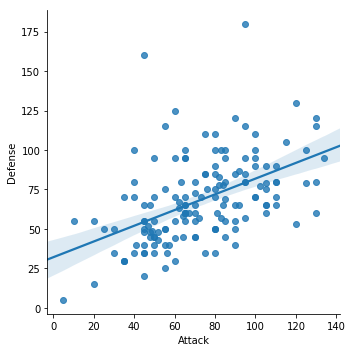

In [26]:
# Let's comapre attach and defence stats for our Pokemon
#recommended way
sns.lmplot(x='Attack', y ='Defense', data = poke_df)

# alternate way
# sns.lmplot(x=df.Attach,y=df.Defense)

Seaborn does not have a dedicated scatter plot function which is why we see a diagonal line. This function fits and plots a regression line. 

We can tweak the function to make changes in the plot
* `fit_reg=False` to remove the regression line
* `hue='Stage'` to color our points. The hue arguement is very useful because it allowd you to express a third dimenstion of infromation using color

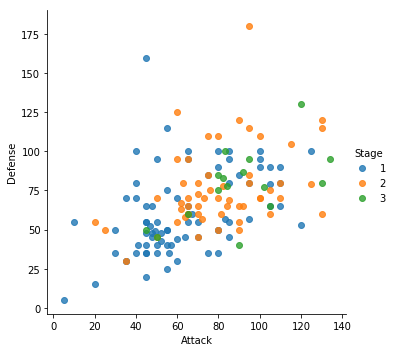

In [29]:
# Scatterplot arguements

sns.lmplot(x='Attack', y ='Defense', data = poke_df, 
           fit_reg=False, # No regression line
           hue='Stage') #Color by evolution stage

# 4. Customizing with Matplotlib
Seaborn is a high-level interface of Matplotlib. Seaborn will getyou most of the way there. but we will sometimes bring in matplotlib. For example to set axis limits 
1. We will invoke the seaborn plotting function as usual
2. Then, invoke Matplotlkib's customization functions. In this case, we will use `ylim()` and `xlim()`

(-20, 141.9881096001028)

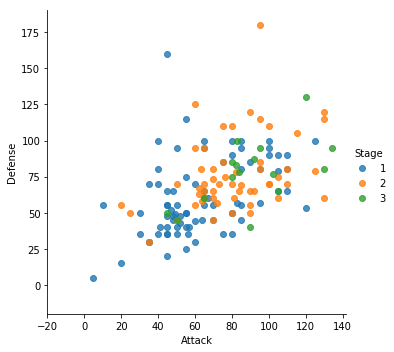

In [31]:
sns.lmplot(x='Attack',y='Defense',data = poke_df,fit_reg=False,hue='Stage')
#Tweaking using matplotlib
plt.ylim(-20,None)
plt.xlim(-20,None)

# 5. Importance of Pandas
Pandas play a very import role. Seaborn's plotting functions benefit from a base DataFrame that's reasonably formatted.
For example we wanted to make a box plot for our  pokemon combat stats

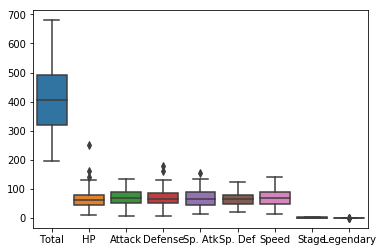

In [33]:
# Boxplot
sns.boxplot(data=poke_df)

We can improve this box plot. 
* We can remove total as we individual stats
* We can remove the stage and legendary columns as they don't contribute to combat stats

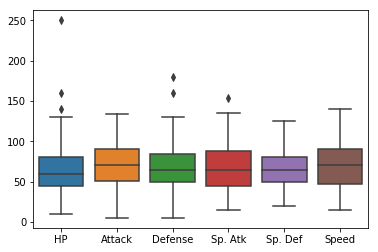

In [36]:
stats_df = poke_df.drop(['Total','Stage','Legendary'],axis=1)
sns.boxplot(data=stats_df)

# 6. Seaborn themes
Seaborn comes with style themse right ouf of the box. The default theme is called 'darkgrid'

We will change the theme to 'whitegrid' while making a violin plot
* Violin plots are useful alternatives to box plots
* They show the distribution through the thickness of the violin instead of only the summary statistics

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


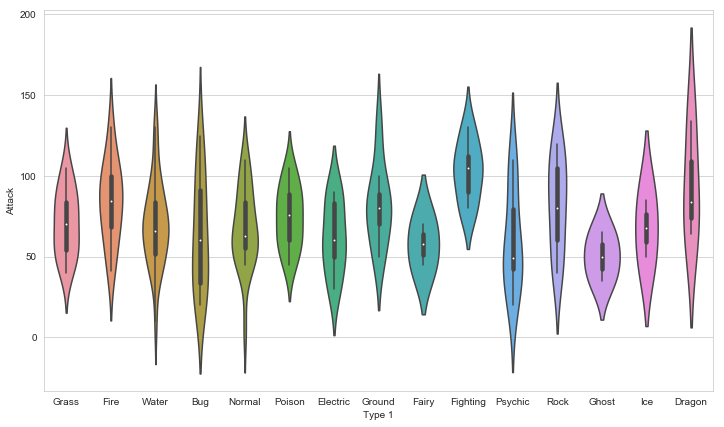

In [46]:
# set theme
sns.set_style('whitegrid')

# Violin plot
plt.figure(figsize=(12,7))
sns.violinplot(x='Type 1', y='Attack', data=poke_df)

# 7. Color  palettes
Seaborn allows to set custom coloe palettes. A python list consisting of color hex values is used to pass the custom color palatte

In [39]:
# custom color palette
pkmn_color_types = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


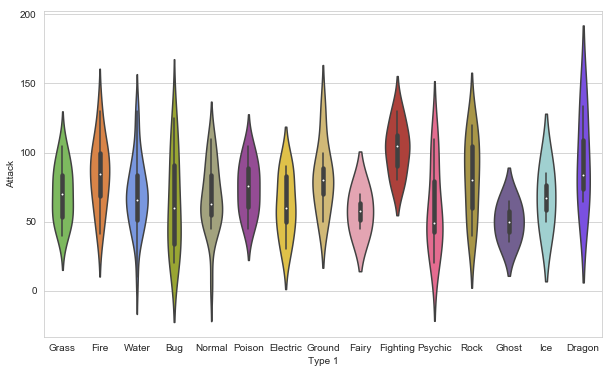

In [44]:
# Violin ploit with Pokemon color palette
plt.figure(figsize=(10,6))
sns.violinplot(x='Type 1', y ='Attack', data=poke_df, 
               palette=pkmn_color_types) # setting color palette

With lesser data points we can see the above data in another plot format by plotting invidvidual data point. Swarm plot shows each point while stacking those with similar values

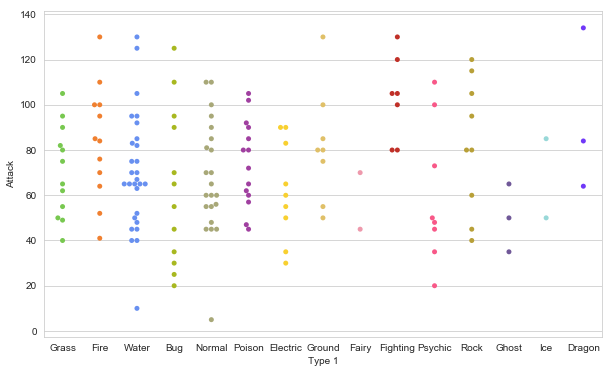

In [43]:
# Swarm plot with Pokemon color palette
plt.figure(figsize=(10,6))
sns.swarmplot(x='Type 1',y ='Attack',data=poke_df, palette=pkmn_color_types)

# 8. Overlaying plots
We can obviously overlay plots in seaborn. We perform the following steps.
1. We will make the figure larger using matplotlib
2. Then we will plot violin plot with `inner=None` to remove the bars inside the violins
3. We will plot the swarm plot and make the points black so they popout on top of the violin plots
4. We will set the title using matplotlib

Text(0.5,1,'Attack by Type')

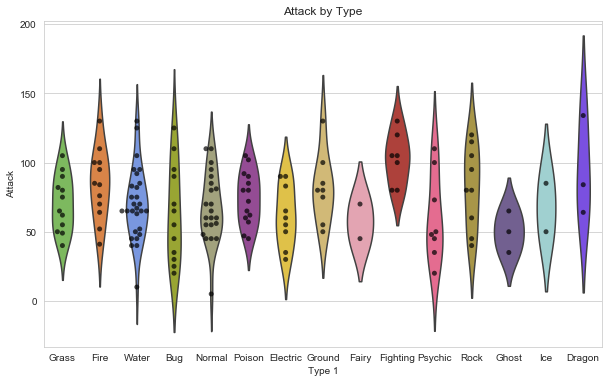

In [42]:
# Set figure size using matplot lib
plt.figure(figsize=(10,6))

# Create plot
sns.violinplot(x='Type 1',
               y='Attack',
               data=poke_df,
               inner=None, #Remove the bars inside the violin
               palette=pkmn_color_types)

sns.swarmplot(x='Type 1',
              y='Attack',
              data=poke_df,
              color='k', # Make points black
              alpha=0.7) # Make the points slightly transparetn

# Set title with matplotlib
plt.title('Attack by Type')

# 9. Putting it all together
We can combine all the information in one chart. We will have to do some data manipulations before we go ahead

In [47]:
stats_df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
#,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45
2,Ivysaur,Grass,Poison,60,62,63,80,80,60
3,Venusaur,Grass,Poison,80,82,83,100,100,80
4,Charmander,Fire,NaN,39,52,43,60,50,65
5,Charmeleon,Fire,NaN,58,64,58,80,65,80


All of our stats are in different columns. Instead we want to melt them into one column. `melt()` takes three arguements
* DataFrame to melt
* ID variables to keep, pandas will melt the remaining columns
* Name for the new column which will be created by this function

In [52]:
# Melt DataFrame
melted_df = pd.melt(stats_df,
                    id_vars=["Name","Type 1","Type 2"], # Variables to keep
                    var_name="Stat") # Name of the melted column

melted_df[melted_df["Name"]=="Bulbasaur"]

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
151,Bulbasaur,Grass,Poison,Attack,49
302,Bulbasaur,Grass,Poison,Defense,49
453,Bulbasaur,Grass,Poison,Sp. Atk,65
604,Bulbasaur,Grass,Poison,Sp. Def,65
755,Bulbasaur,Grass,Poison,Speed,45


All of the 6 columns have been "melted" into one and the new Stat column indicates the original stat  and value column holds the value from the original data frame. Hence Bulbasaur has 6 rows now.

Now we make a swarm plot with `melted_df` and do the following
* Set `x='Stat'` and `y='value'` so our swarms are seperated by stat
* We will set `hue='Type 1'` to color our points by Pokemon type

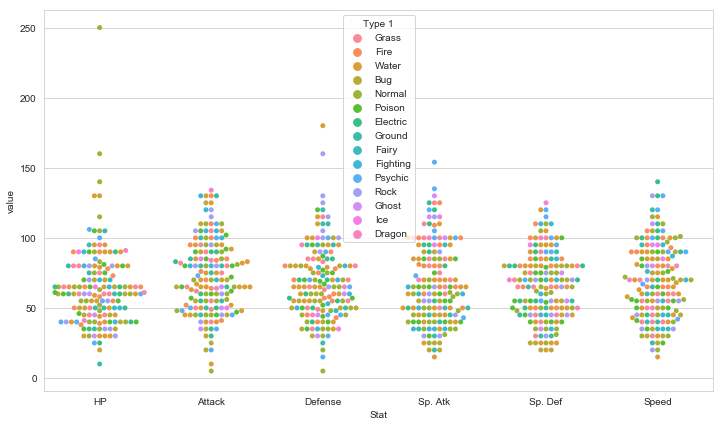

In [53]:
# Swarmplot with melted_df
plt.figure(figsize=(12,7))

sns.swarmplot(x='Stat',y='value',data=melted_df,hue='Type 1')

Let's make some tweaks to make the plot more readable
1. Seperate points by hue using the arguement `split=True`
2. User our custom Pokemon color palette
3. Adjust the y axis to ensure it starts at 0
4. Place the legend to the right

/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:2974: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


Text(0.5,1,'Overall stat combined')

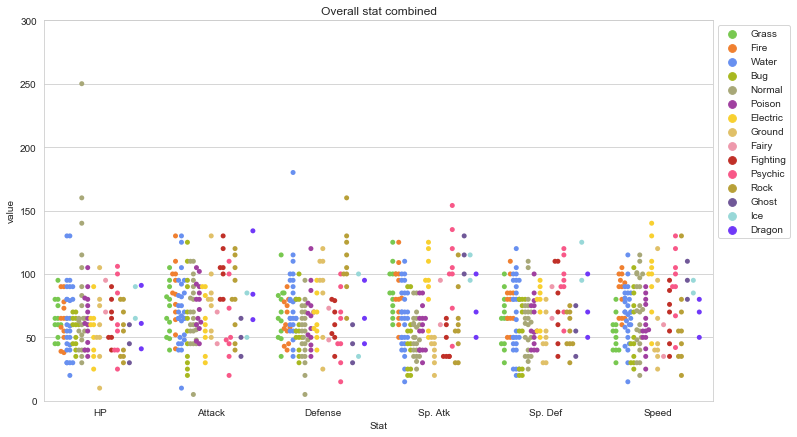

In [54]:
plt.figure(figsize=(12,7))

sns.swarmplot(x='Stat',
              y='value',
              data=melted_df,
              hue='Type 1',
              split=True, # Split points by hue
              palette=pkmn_color_types) # Use pokemon palette

# set y axis
plt.ylim(0,300)

# Place the legent to the right
plt.legend(bbox_to_anchor=(1,1), loc=2)

# Give titel to the plot
plt.title("Overall stat combined")

# 10. Other Seaborn plots
We will quickly look at some other data visualizations possible through seaborn

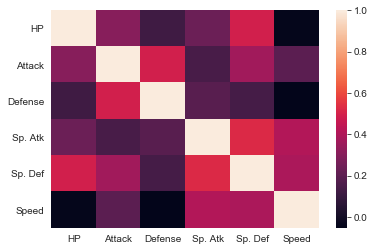

In [55]:
# Heatmap
corr = stats_df.corr() # find correlation

sns.heatmap(corr)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


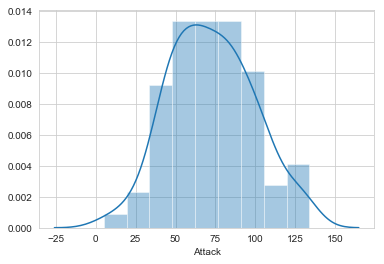

In [56]:
# Distribution plot
sns.distplot(poke_df.Attack)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

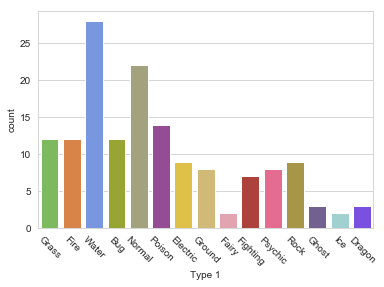

In [58]:
# Bar plot
sns.countplot(x='Type 1', data=poke_df, palette=pkmn_color_types)

# Rotate x-lables
plt.xticks(rotation=-45)

/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


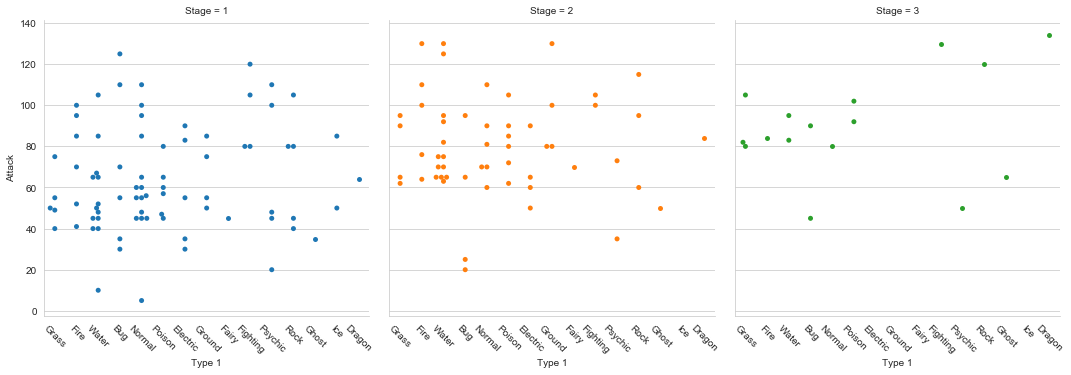

In [60]:
# Factor Plot - Make it easy to seperate plots by category
g = sns.factorplot(x='Type 1',
                   y='Attack',
                   data=poke_df,
                   hue='Stage', # Color by Stage
                   col='Stage', # Seperate by Stage
                   kind='swarm') # Kind of plot is swarm in this case

# Rotate x-axis lables
g.set_xticklabels(rotation=-45)

# plt.xticks(rotation=-45) does not work as it only rotates the last plot

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


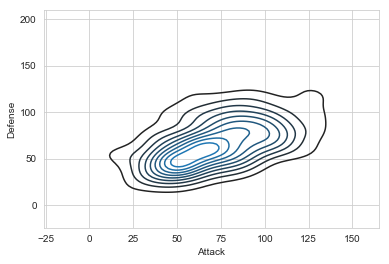

In [63]:
# Density plot - displays distribution between two variables
sns.kdeplot(poke_df.Attack,poke_df.Defense)
# Pro-tip: Overlay with scatter plot

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


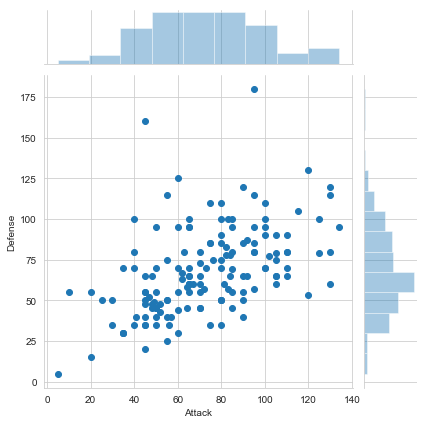

In [65]:
# Joint Distribution Plot - combine information from scatter plots and histograms to give 
# you detailed information of bi-variate distributions
sns.jointplot(x='Attack',y='Defense',data=poke_df)